In [96]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import math

In [18]:

#https://lsst-web.ncsa.illinois.edu/sim-data/StarMaps/

density_i_nside64 = np.load("starDensity_i_nside_128.npz")

In [19]:
list(density_i_nside64.keys())

['starDensity', 'bins', 'overMaxMask']

In [20]:
density_i_nside64['starDensity'].shape

(196608, 65)

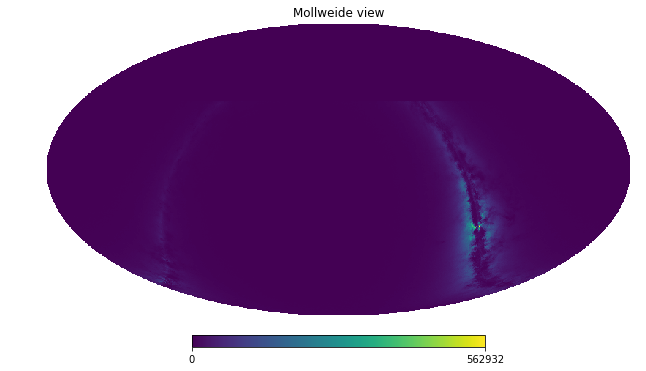

In [52]:
hp.mollview(density_i_nside64['starDensity'][:,15])

In [17]:
44e3/hp.nside2npix(128)

0.22379557291666666

In [15]:
lsst_arcsec_per_pixel = 0.2
lsst_chip_area_sq_deg = 4000**2 * (lsst_arcsec_per_pixel**2) / 3600**2
lsst_chip_area_sq_deg

0.04938271604938273

In [74]:
hp.pix2ang(128, 5000, lonlat=True, nest=True)

(63.984375, 33.868704601656496)

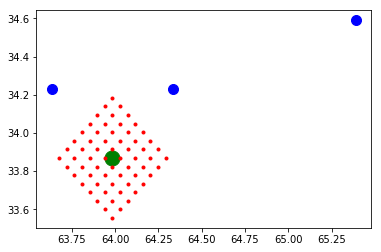

In [122]:
angs = [hp.pix2ang(128, x, lonlat=True, nest=True) for x in (4999, 5000, 5001, 5002)]
plt.plot([x[0] for x in angs], [x[1] for x in angs], 'bo', ms=10)
plt.plot(angs[1][0], angs[1][1], 'go', ms=15)

extra_pow = 3


extra_pix = 4**extra_pow
angs = [hp.pix2ang(128 * 2**extra_pow, x, lonlat=True, nest=True)
        for x in np.arange((5000 * 4**extra_pow) , (5000 * 4**extra_pow) + extra_pix)]

plt.plot([x[0] for x in angs], [x[1] for x in angs], 'ro', ms=3)


In [130]:
def calc_separation(angle1, angle2):
    return math.sqrt((angle1[0] - angle2[0])**2 + (angle1[1] - angle2[1])**2)

extra_pow = 10
sep = calc_separation(hp.pix2ang(128 * 2**extra_pow, 5000 * 4**extra_pow, lonlat=True, nest=True),
                      hp.pix2ang(128 * 2**extra_pow, 5000 * 4**extra_pow + 1, lonlat=True, nest=True))
sep*3600

1.7637518291776448

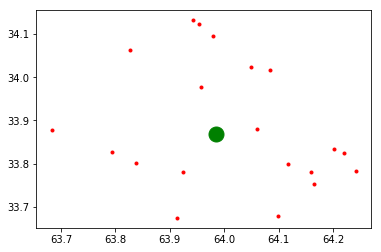

In [138]:

central_pixel = 5000
starting_nside = 128
n_stars = 20
extra_pow = 10
extra_pix = 4**extra_pow

star_pixels = np.random.choice(np.arange(central_pixel * 4**extra_pow, (central_pixel * 4**extra_pow) + extra_pix), n_stars)
angs = [hp.pix2ang(starting_nside * 2**extra_pow, x, lonlat=True, nest=True)
        for x in star_pixels]
plt.plot([x[0] for x in angs], [x[1] for x in angs], 'ro', ms=3)

center = hp.pix2ang(starting_nside, central_pixel, lonlat=True, nest=True)
plt.plot(center[0], center[1], 'go', ms=15)
